In [10]:
# import numpyro
# numpyro.util.set_host_device_count(4)
# import numpyro.distributions as dist
# from numpyro.infer import MCMC, NUTS, Predictive, DiscreteHMCGibbs

# from jax import numpy as jnp
# from jax import random

import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az

import siuba as s
from siuba import _

from plotnine import *

In [2]:
df = pd.read_csv("data/exp1.csv")

df = df >> s.filter(_.pass_check==1) >> s.mutate(response = _.response.replace({0:.001, 1:.999}))

print(df.shape)
df.head()

(7680, 13)


,ID,age,gender,race,zip,StartDate,duration,pass_check,response,querytype,weather_cond,location_cond,condition
0,1,53,Man,White,72088.0,2021-05-10T13:52:06Z,617,1,0.7,A,coldrainy,london,coldrainy_london
1,2,27,Woman,White,28390.0,2021-05-10T13:59:41Z,1075,1,0.2,A,coldrainy,london,coldrainy_london
2,3,28,Man,White,10956.0,2021-05-10T14:12:27Z,543,1,0.5,A,coldrainy,london,coldrainy_london
3,4,32,Man,White,56187.0,2021-05-10T14:15:45Z,805,1,0.5,A,coldrainy,london,coldrainy_london
4,5,31,Man,White,66021.0,2021-05-10T14:22:09Z,491,1,0.7,A,coldrainy,london,coldrainy_london


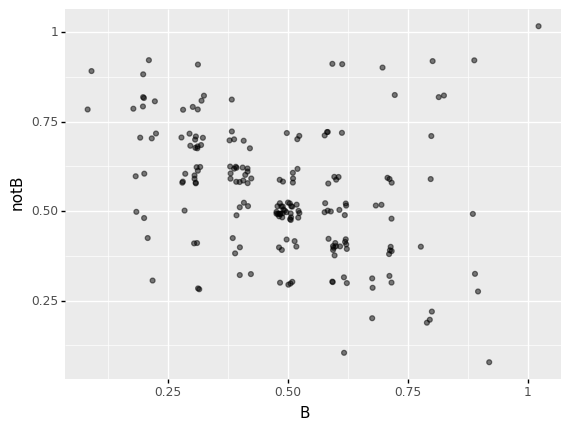

<ggplot: (8742909372139)>

In [66]:
## see if things that should be correlated are correlated, like A and notA

x =(
df >>
    s.filter(_.condition.str.contains("london") ) >>
    # s.filter(_.querytype.str.fullmatch("BgA|notBgA")) >>
    s.spread("querytype", "response")
)

ggplot(x, aes(x="B", y="notB")) + geom_jitter(width=.025, height=.025, alpha=.5)

# np.corrcoef(x.AandB+x.AandnotB, x.A)

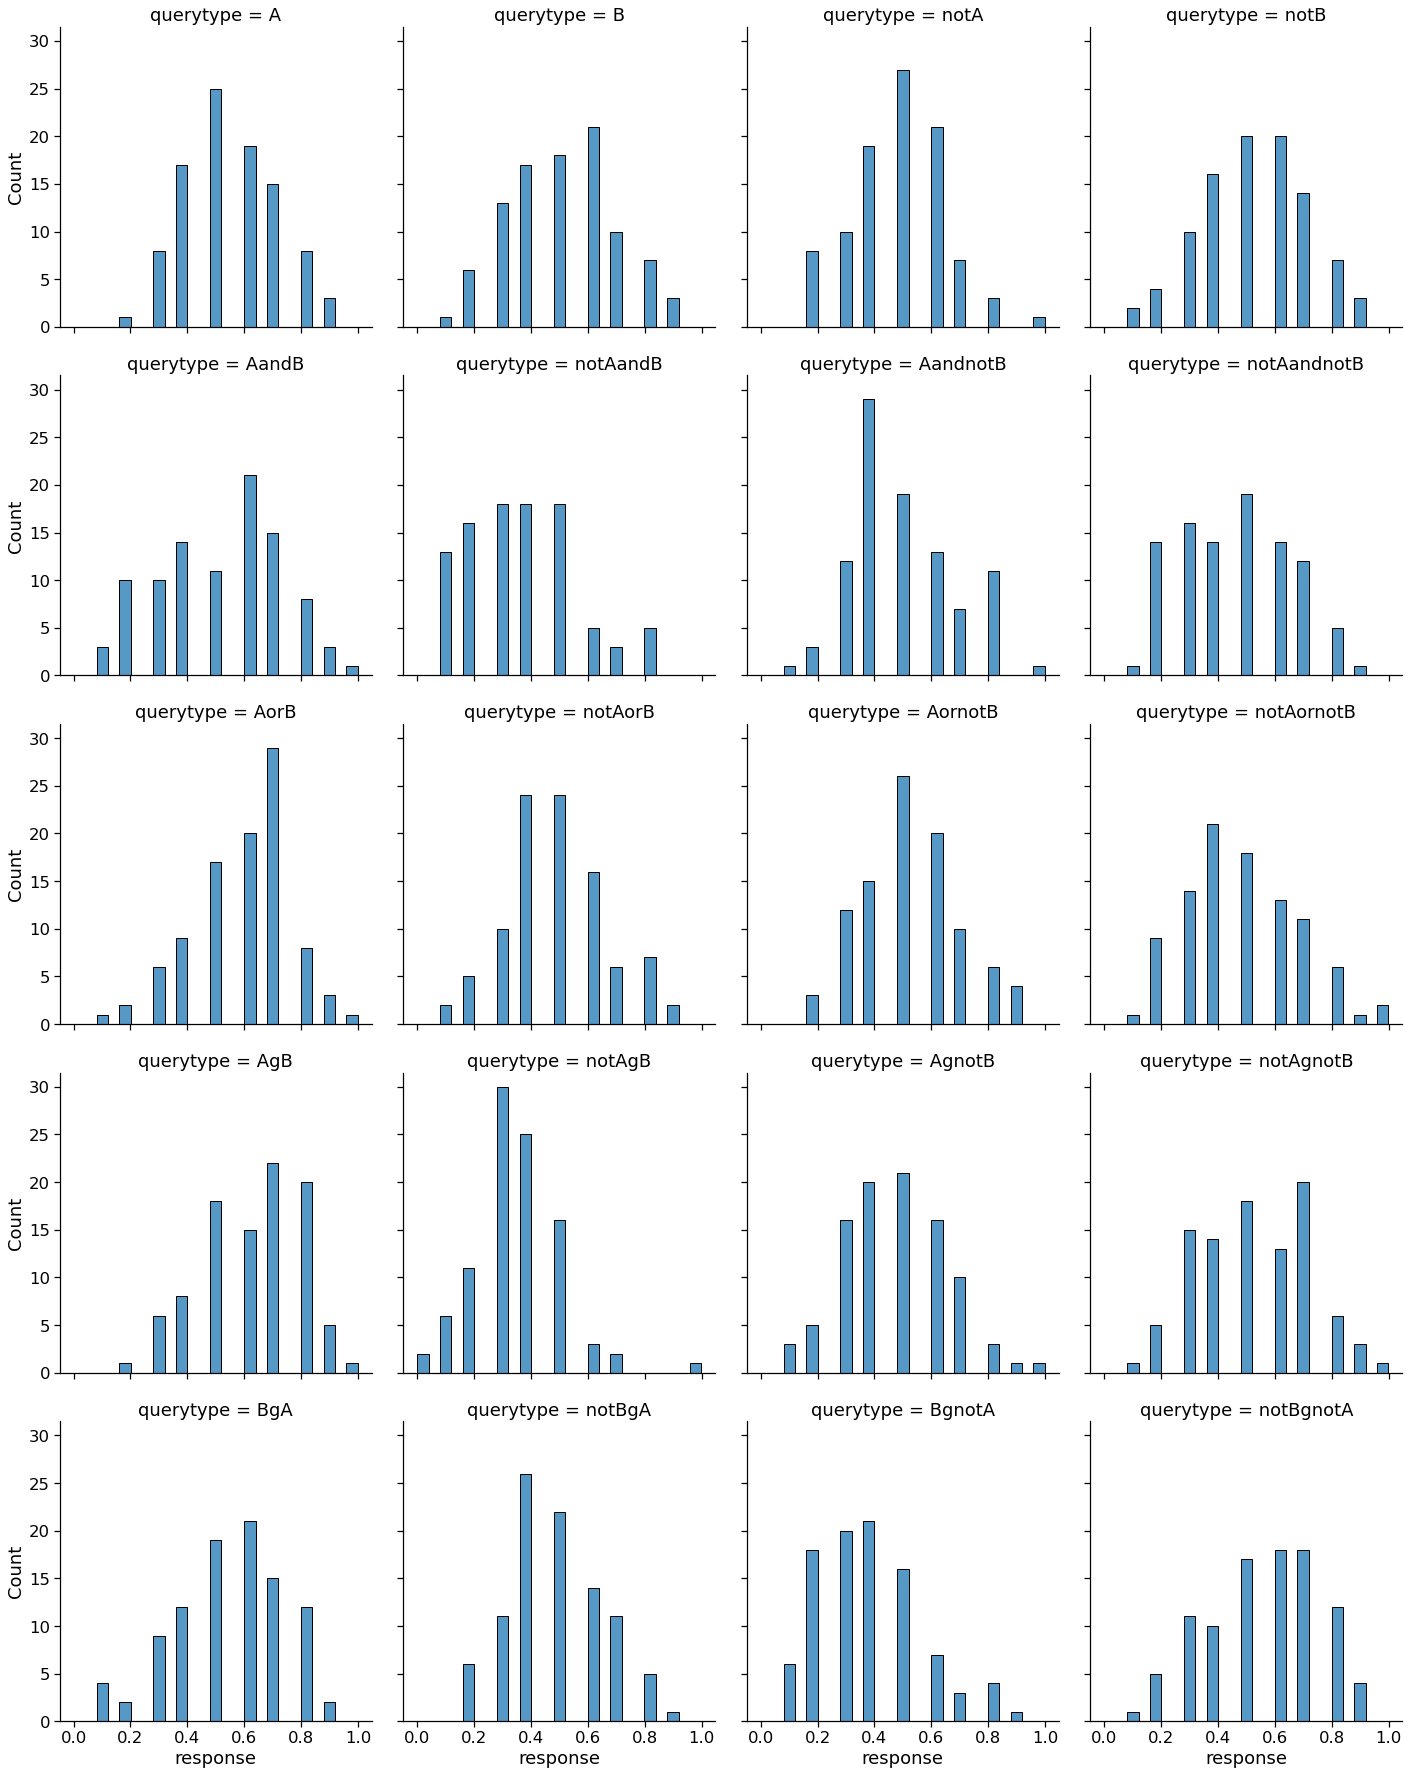

In [21]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.displot(df[df.condition=="coldrainy_london"], x="response", col="querytype", col_wrap=4, bins=25)

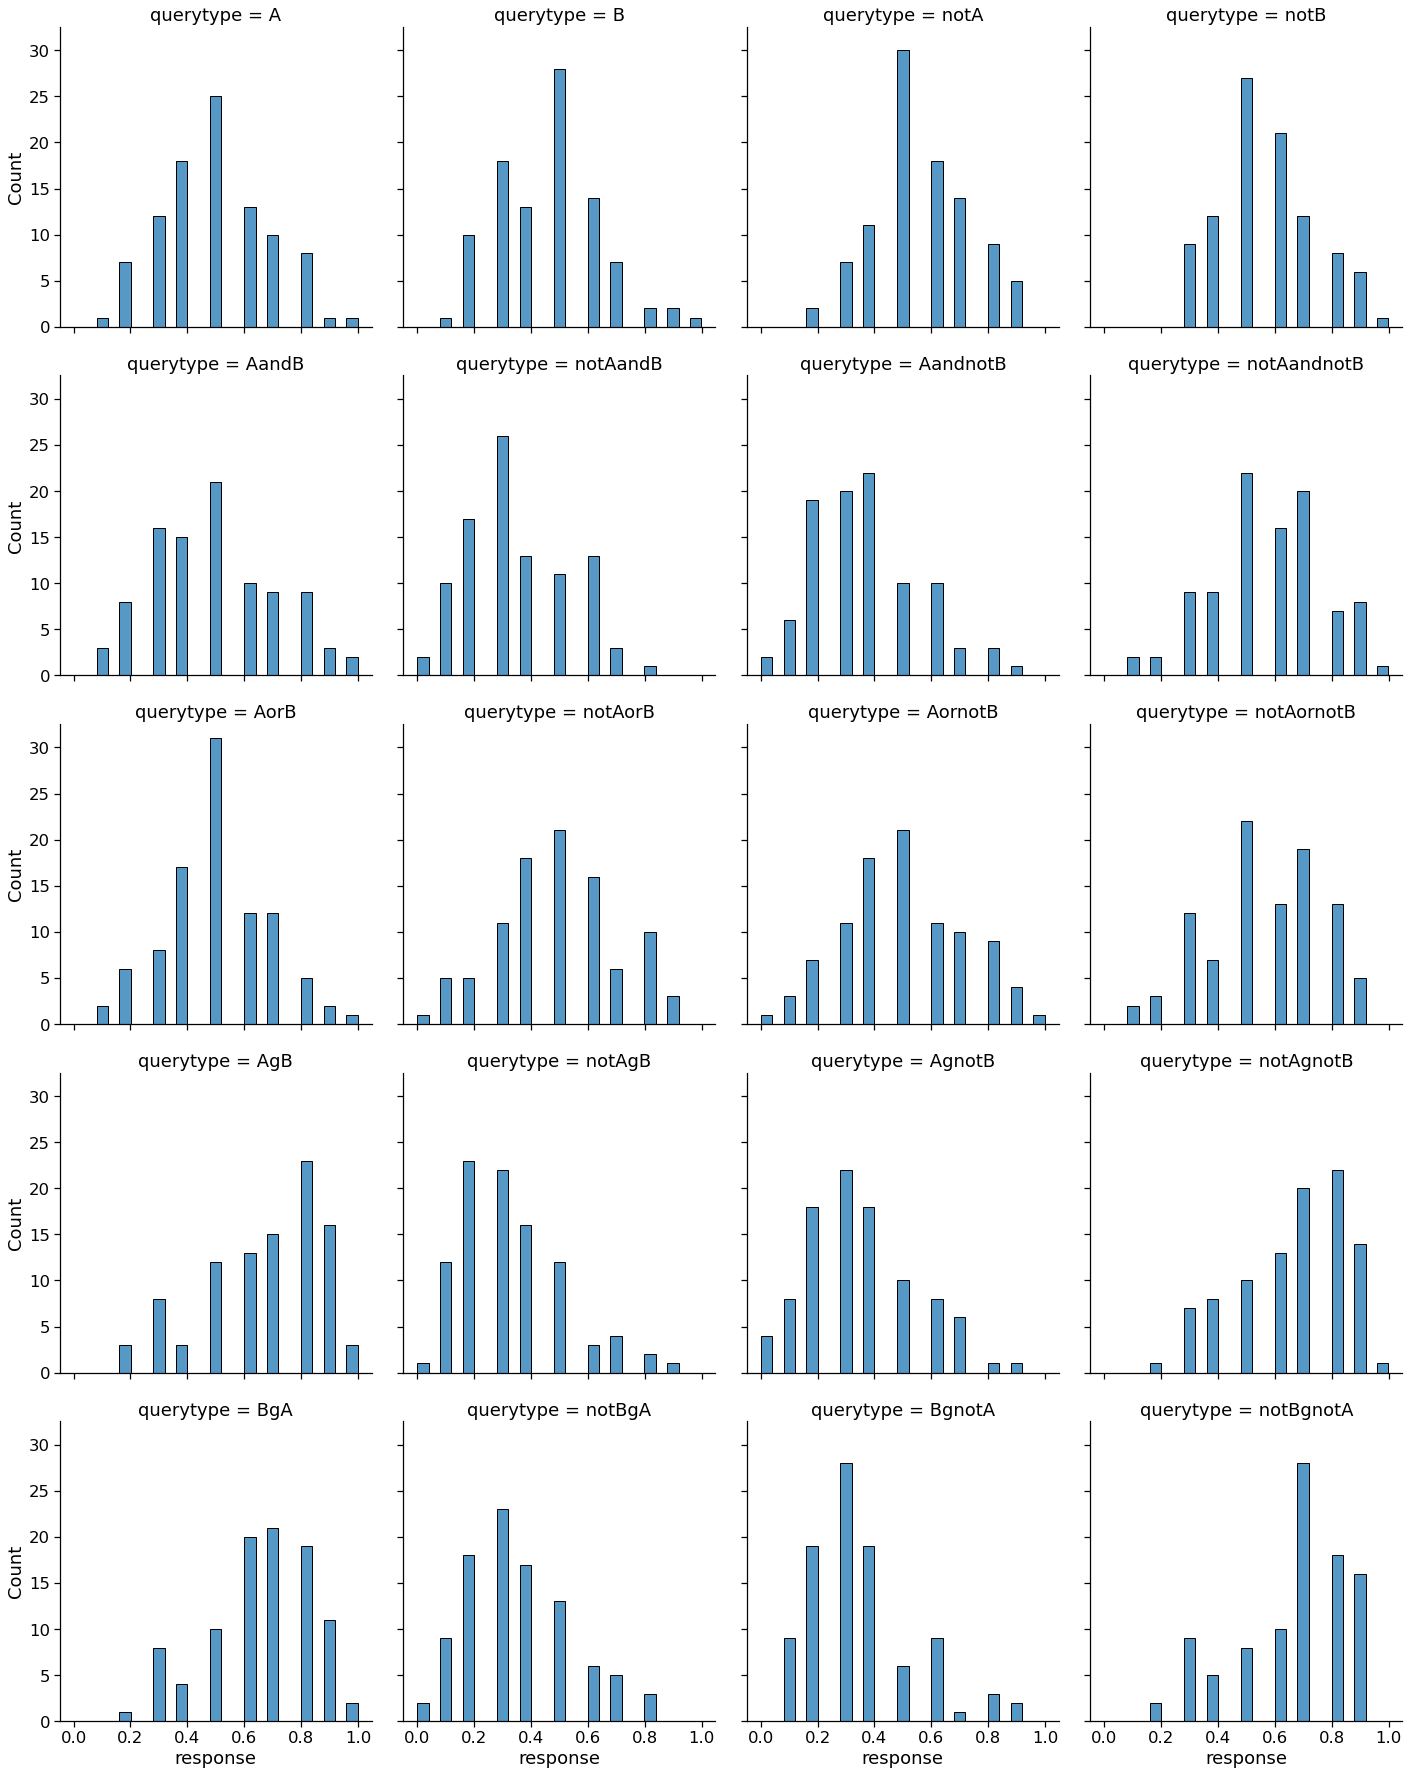

In [22]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.displot(df[df.condition=="sunnywarm_london"], x="response", col="querytype", col_wrap=4, bins=25)

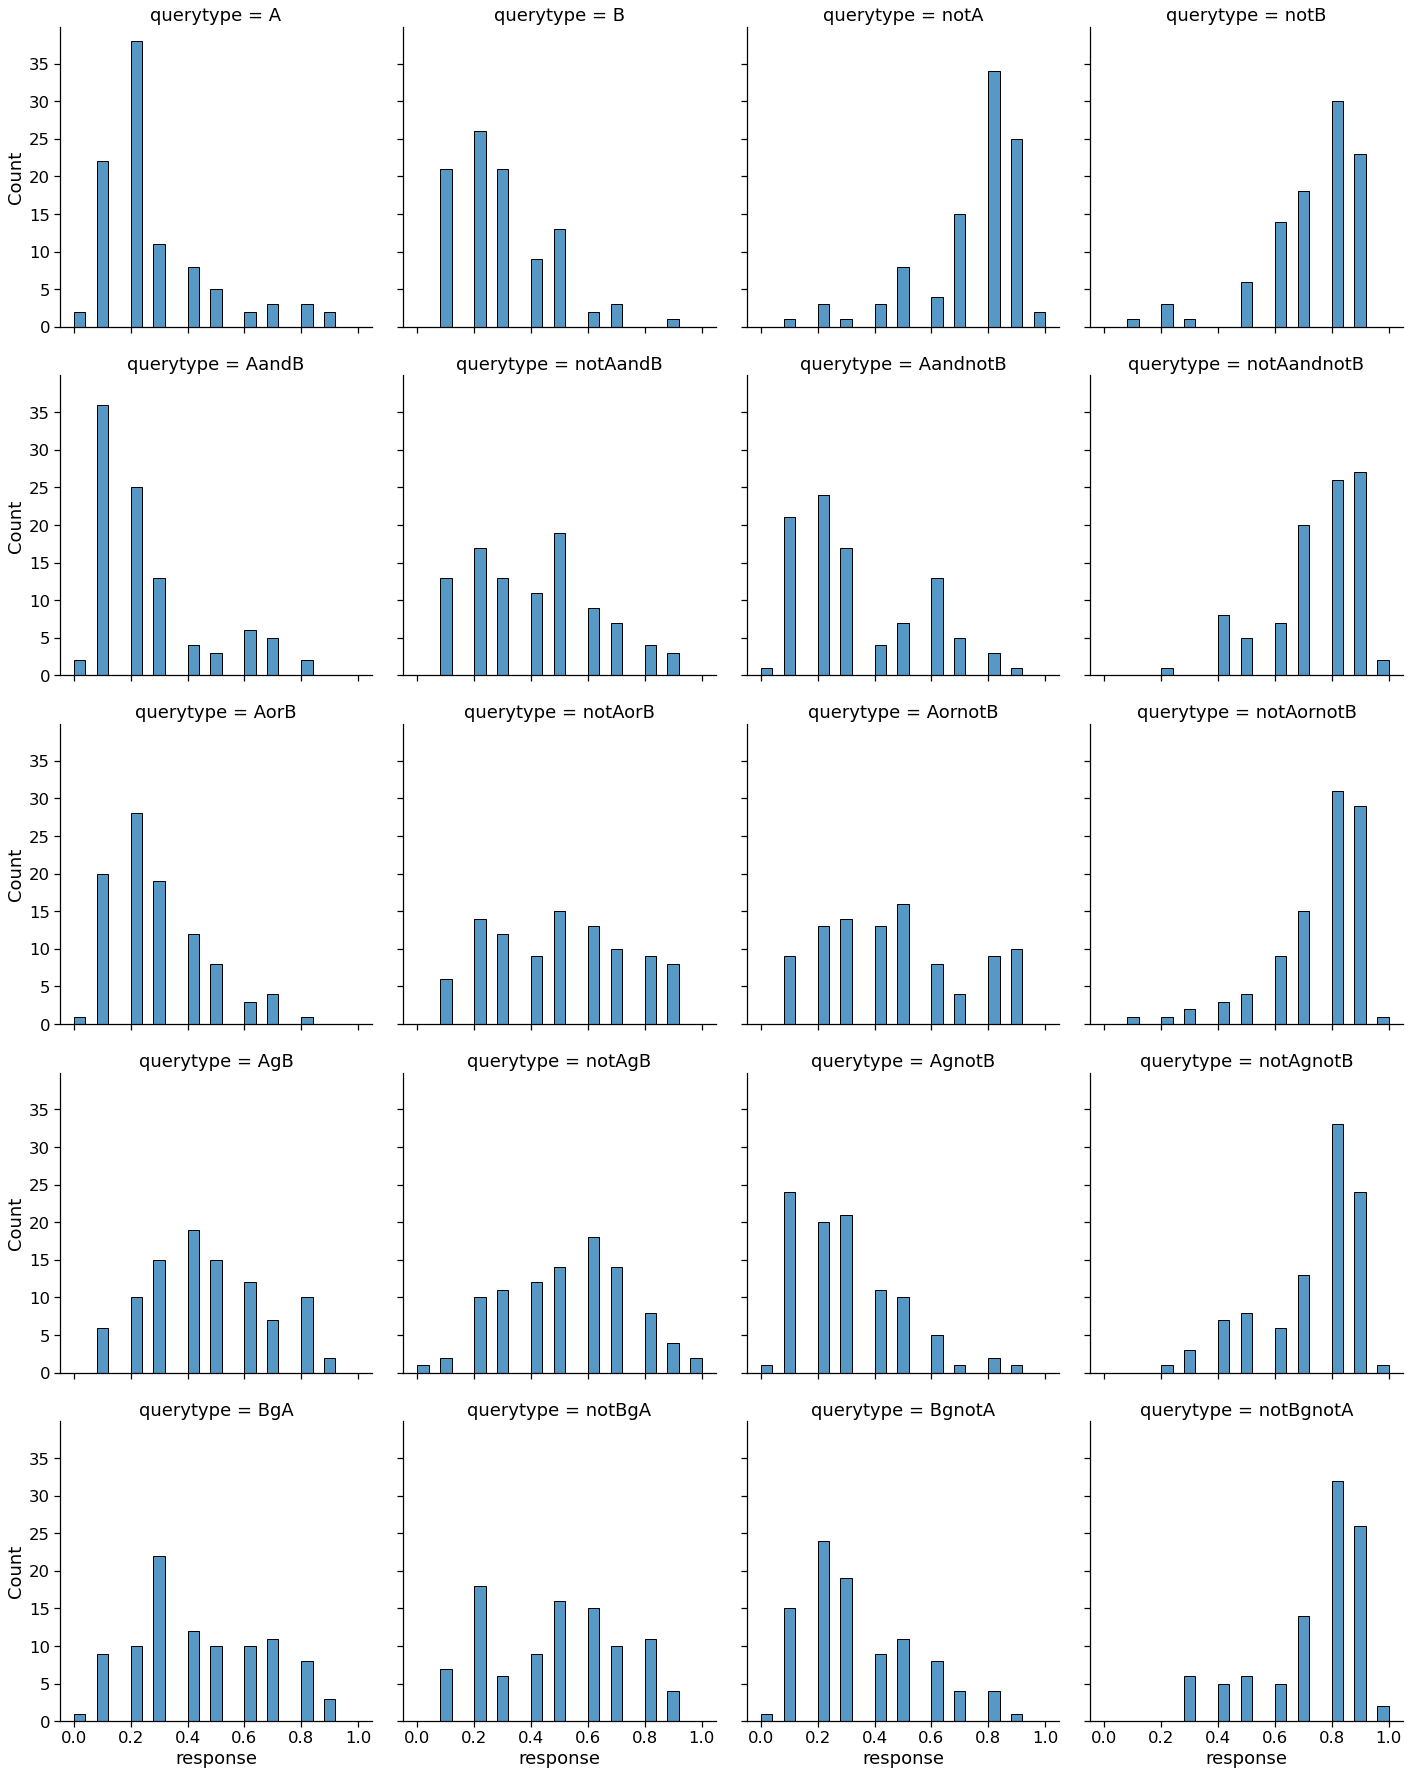

In [34]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.displot(df[df.condition=="coldrainy_LA"], x="response", col="querytype", col_wrap=4, bins=25)

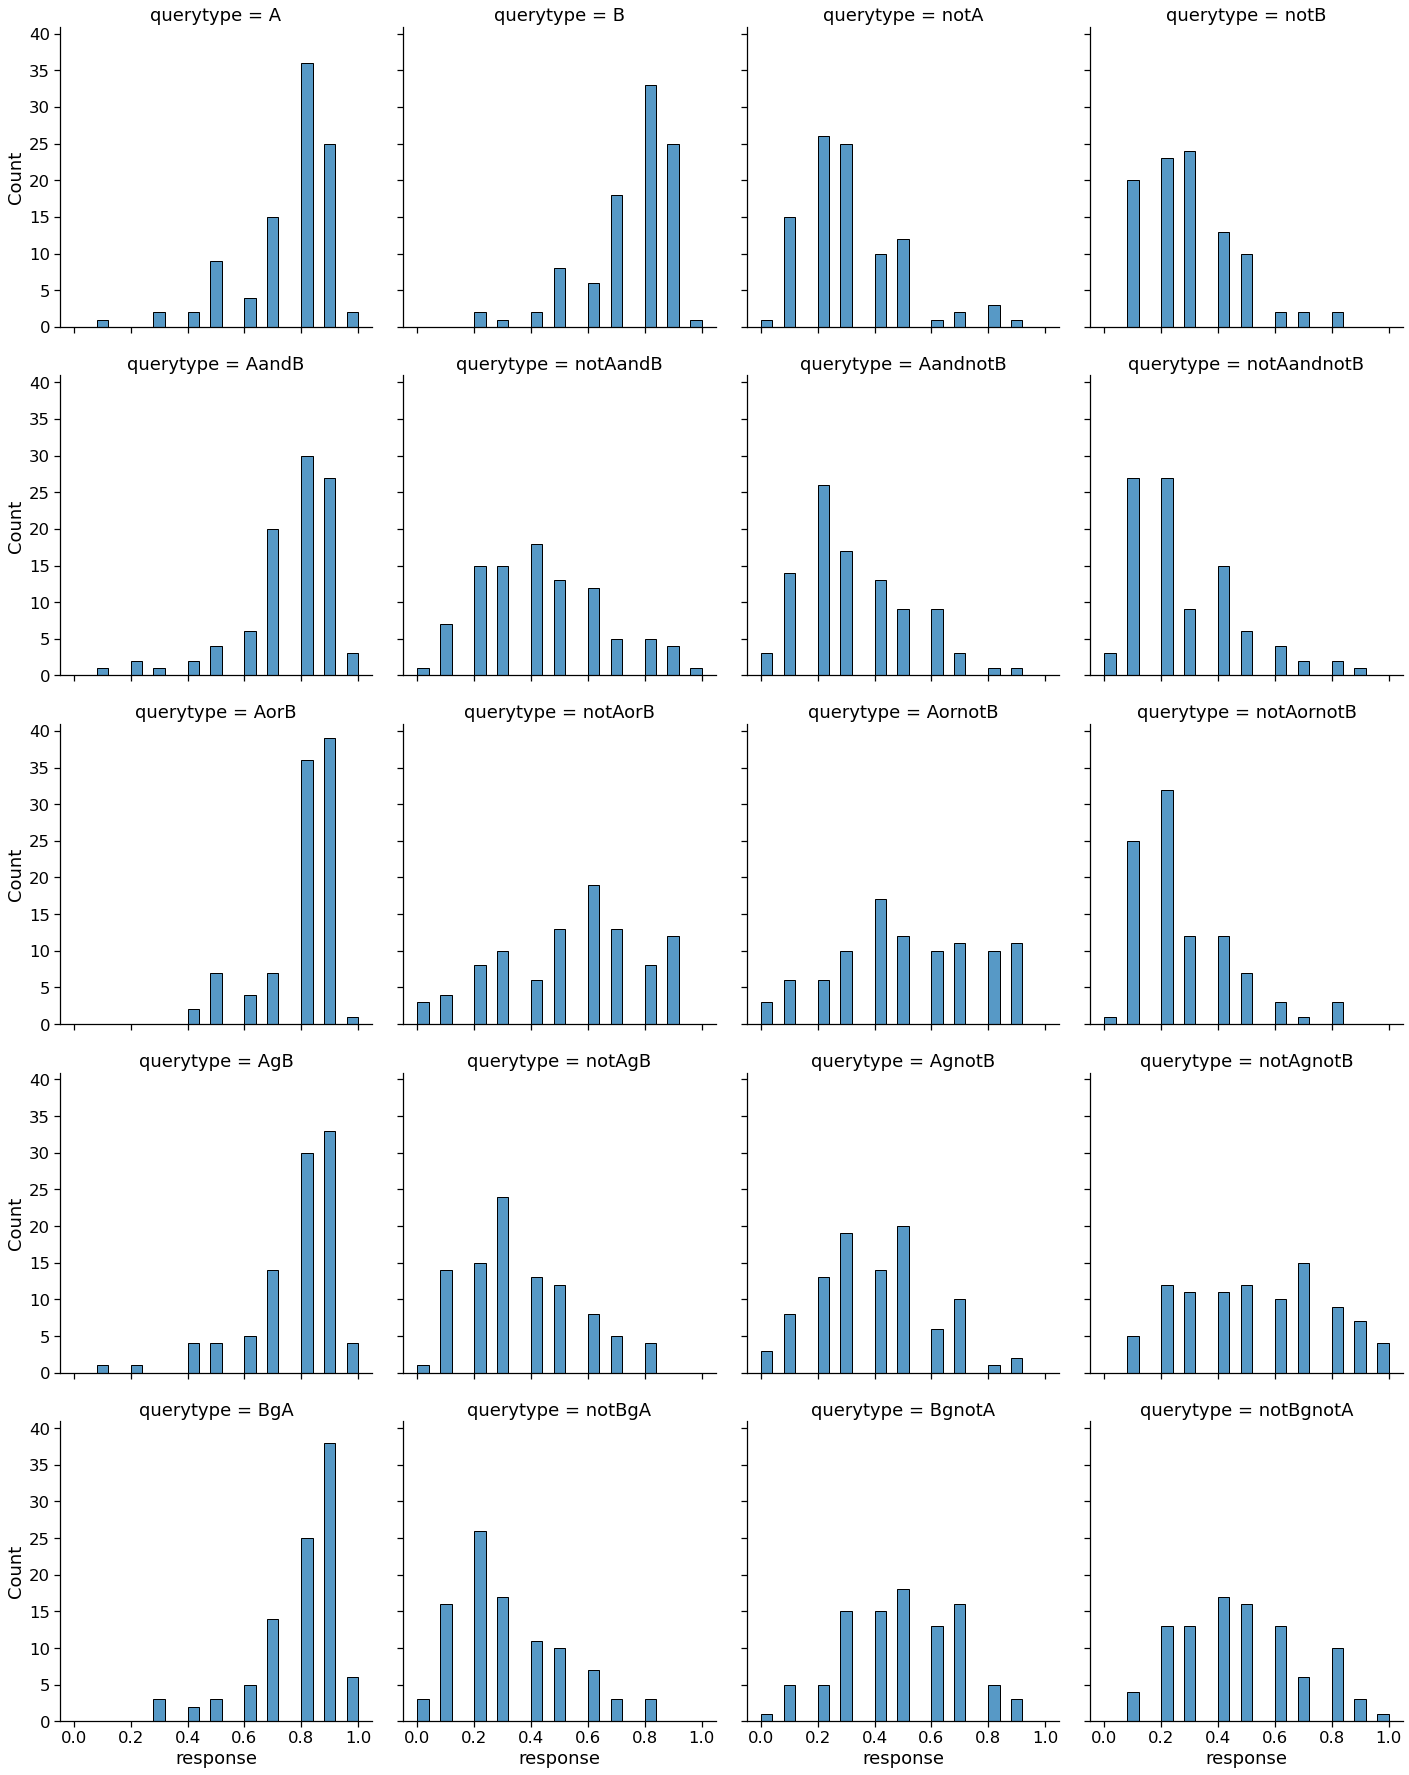

In [35]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.displot(df[df.condition=="sunnywarm_LA"], x="response", col="querytype", col_wrap=4, bins=25)